# Telecom Churn case study using PCA and Ensemble

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Goal
It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"
Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
import xgboost as xgb 

from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# to ignore the warnings
warnings.filterwarnings('ignore')

## Step 1. Reading, Understanding and Visualizing the data

In [2]:
# train dataset
telecom_train_df = pd.read_csv('train (1).csv')
# test dataset
telecom_test_df = pd.read_csv('test (1).csv')
# test solution dataset
telecom_test_sol_df = pd.read_csv('solution (1).csv')

In [3]:
telecom_train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
telecom_test_sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [6]:
telecom_train_df.shape

(69999, 172)

In [7]:
telecom_test_df.shape

(30000, 171)

In [8]:
telecom_train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [9]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [10]:
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [11]:
telecom_train_df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [12]:
telecom_train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [13]:
# Columns which we have to impute as Zero as thy should not be dropped based on missing values becuase they are important.
rech_cols_to_impute = [x for x in telecom_train_df.columns if 'rech' in x and 
                       'count' not in x and 'date' not in x and 'num' not in x]
telecom_train_df[rech_cols_to_impute] = telecom_train_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))
telecom_test_df[rech_cols_to_impute] = telecom_test_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))


### Dropping rows for both train and test datasets
 - Rows which are empty

In [14]:
telecom_train_df.dropna(axis=0, how='all', inplace=True)
telecom_test_df.dropna(axis=0, how='all', inplace=True)

In [15]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 172)
(30000, 171)


### Dropping columns for both train and test datasets

    - Not needed columns like Id, last_date_of_month_6 etc.
    - Columns having more than 70% values as null

In [16]:
# For us dates doesn't matter as long as customer is doing a recharge.
cols_to_delete = ['id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
                 ]
telecom_train_df.drop(cols_to_delete, axis=1, inplace=True)
telecom_test_df.drop(cols_to_delete, axis=1, inplace=True)

In [17]:
# to check the % of null values
round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()

arpu_3g_8           0.74
night_pck_user_8    0.74
night_pck_user_7    0.74
arpu_2g_8           0.74
arpu_2g_7           0.74
fb_user_7           0.74
arpu_3g_7           0.74
fb_user_8           0.74
count_rech_3g_8     0.74
count_rech_3g_7     0.74
count_rech_2g_8     0.74
count_rech_2g_7     0.74
arpu_2g_6           0.75
count_rech_3g_6     0.75
night_pck_user_6    0.75
fb_user_6           0.75
arpu_3g_6           0.75
count_rech_2g_6     0.75
dtype: float64

In [18]:
# count of missing data > 70% columns in train dataset
len(round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values())

18

In [19]:
# count of missing data > 70% columns in test dataset
len(round((pd.isnull(telecom_test_df).sum()/len(telecom_test_df.index)),2)[pd.isnull(telecom_test_df).sum()/ len(telecom_test_df.index) > 0.70].sort_values())

18

### As we have more than 70% data as null for 18 columns in train and test, we are dropping these columns from dataset.

In [20]:
cols_to_delete = ((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index))[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()).keys()

In [21]:
cols_to_delete = cols_to_delete.to_list()
print(cols_to_delete)

['arpu_3g_8', 'night_pck_user_8', 'arpu_2g_8', 'count_rech_3g_8', 'fb_user_8', 'count_rech_2g_8', 'arpu_3g_7', 'fb_user_7', 'arpu_2g_7', 'night_pck_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_6']


In [22]:
telecom_train_df = telecom_train_df.drop(cols_to_delete, axis=1)

In [23]:
telecom_train_df.shape

(69999, 144)

In [24]:
telecom_test_df = telecom_test_df.drop(cols_to_delete, axis=1)

In [25]:
telecom_test_df.shape

(30000, 143)

## Lets check the data types of columns now

In [26]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 144 entries, circle_id to churn_probability
dtypes: float64(117), int64(27)
memory usage: 77.4 MB


In [27]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Columns: 143 entries, circle_id to jun_vbc_3g
dtypes: float64(117), int64(26)
memory usage: 33.0 MB


### We can see now we don't have any categorical data, all are numerical data only.

### Imputing the na values with
 - Median for numerical variables
 - Mode for categorical variables - Not needed in out this case.

In [28]:
# A generic method to impute na
def replace_na(df, columns, data_type):
    for col in columns:
        if data_type == 'categorical':
            value = pd.to_datetime(df[col]).mode()
        else:
            value = df[col].median()
        df[col].fillna(value, inplace=True)
    return df

In [29]:
telecom_train_df = replace_na(telecom_train_df, telecom_train_df.columns, 'numerical')
telecom_test_df = replace_na(telecom_test_df, telecom_test_df.columns, 'numerical')

### Lets check for unique entries in train and test dataset

In [30]:
def cols_to_delete_unique(df, df_columns, threshold=4):
    # threshold=4 means column has only 1 unique value
    # eg. telecom_train_df['circle_id'].describe().unique() --> array([30000.,   109.,     0.])
    # Here because there are all 109 in column, we have only 3 entries in array.
    cols_to_delete = []
    for column in df_columns:
        if len(df[column].describe().unique()) < threshold:
            cols_to_delete.append(column)
    
    return cols_to_delete

In [31]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 144)
(30000, 143)


In [32]:
# on train data
telecom_train_df = telecom_train_df.drop(cols_to_delete_unique(telecom_train_df, telecom_train_df.columns), axis=1)
print(telecom_train_df.shape)

# on test data
telecom_test_df = telecom_test_df.drop(cols_to_delete_unique(telecom_test_df, telecom_test_df.columns), axis=1)
print(telecom_test_df.shape)

(69999, 134)
(30000, 133)


### Lets find the high value customers based on recharge done in 6th and 7th month and update dataframe

### For train data

In [33]:
# total data recharge in 6th, 7th and 8th months
telecom_train_df["total_data_recharge_amnt_6"] = telecom_train_df.total_rech_data_6 * telecom_train_df.av_rech_amt_data_6
telecom_train_df["total_data_recharge_amnt_7"] = telecom_train_df.total_rech_data_7 * telecom_train_df.av_rech_amt_data_7
telecom_train_df["total_data_recharge_amnt_8"] = telecom_train_df.total_rech_data_8 * telecom_train_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_train_df["total_recharge_amnt_6"] = telecom_train_df.total_rech_amt_6 + telecom_train_df.total_data_recharge_amnt_6
telecom_train_df["total_recharge_amnt_7"] = telecom_train_df.total_rech_amt_7 + telecom_train_df.total_data_recharge_amnt_7
telecom_train_df["total_recharge_amnt_8"] = telecom_train_df.total_rech_amt_8 + telecom_train_df.total_data_recharge_amnt_8

# average recharge for 6th and 7th month
telecom_train_df['average_amnt_6_7'] = (telecom_train_df["total_recharge_amnt_6"] + telecom_train_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_train_df['average_amnt_6_7'].quantile(.70)

477.5

## Filter dataset based on average_amnt_6_7 (70th percentile for train dataset is 477.5)

In [34]:
telecom_train_df = telecom_train_df[telecom_train_df["average_amnt_6_7"]>= telecom_train_df["average_amnt_6_7"].quantile(.70)]

In [35]:
telecom_train_df.shape

(21013, 141)

In [36]:
# Lets remove not needed newly added features
telecom_train_df.drop(['total_data_recharge_amnt_6', 'total_data_recharge_amnt_7', 'total_data_recharge_amnt_8',
                        'total_recharge_amnt_6', 'total_recharge_amnt_7', 'total_recharge_amnt_8',
                        'average_amnt_6_7'], 
                      axis=1, inplace=True)

## Lets focus on Outliers now and treat them

In [37]:
# Generic method to remove outliers
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [38]:
telecom_train_df_wo_outlier = remove_outliers(telecom_train_df, telecom_train_df.columns)
telecom_test_df_wo_outlier = remove_outliers(telecom_test_df, telecom_test_df.columns)

In [39]:
telecom_train_df.shape

(21013, 134)

In [40]:
telecom_test_df.shape

(30000, 133)

In [41]:
telecom_train_df_wo_outlier.shape

(18805, 134)

In [42]:
telecom_test_df_wo_outlier.shape

(26190, 133)

### Even though there are outliers but in this assignmnet we are looking for higest paying customers only.
### So better we decided not to remove outliers.

## Let's check for Data imbalance here

In [43]:
churn_data_rows = telecom_train_df['churn_probability'].sum()

In [44]:
churn_data_rows/len(telecom_train_df) * 100

8.275829248560415

### We can see that there is a data imbalance. We have only about 8.28% of data as Churn and 91.72% as not churn.
### So we need to apply data imbalance technique. We will use SMOTE.

## Dividing the data from telecom_train_df to train the model

In [45]:
y = telecom_train_df['churn_probability']
X = telecom_train_df.drop(['churn_probability'], axis=1)

telecom_train_df.drop('churn_probability', axis=1, inplace=True)

In [46]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Taking a backup of variables

In [47]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

## Rescaling of the variables

- We will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [48]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# fit on data
# removed churn_probability becuase test data is not having it.
# Also churn_probability is having 0 and 1 only. So it need not be scaled.
train_numerical_columns = telecom_train_df.columns.to_list()
X_train[train_numerical_columns] = scaler.fit_transform(X_train[train_numerical_columns])
X_train.head()
# So all numberic values are now between 0 and 1

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
6968,0.127277,0.274576,0.081830,0.004624,0.004018,0.002985,0.011537,0.040985,0.006554,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.337600,0.000000,0.002051,0.000000
42203,0.156166,0.094305,0.083632,0.066057,0.041462,0.074009,0.065428,0.053213,0.049054,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.009660,0.000000,0.000000,0.000000
18406,0.151447,0.122733,0.087708,0.015153,0.016084,0.008306,0.056327,0.259820,0.136117,0.005055,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.702487,0.000000,0.000000,0.000000
21455,0.171177,0.128305,0.077781,0.009636,0.010909,0.006579,0.081607,0.121132,0.038009,0.005166,...,0.0,0.0,0.0,0.000000,0.030303,0.02439,0.542381,0.029661,0.043865,0.039021
66143,0.138174,0.087866,0.074838,0.000000,0.006171,0.001633,0.000000,0.033354,0.020053,0.000000,...,0.0,0.0,0.0,0.034483,0.000000,0.00000,0.055301,0.098218,0.000000,0.000000


In [51]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [52]:
X_resampled.shape

(27020, 133)

In [53]:
sum(y_resampled)/len(y_resampled) * 100

50.0

In [54]:
telecom_test_df.shape

(30000, 133)

## Now there is no data imbalance.

In [55]:
# Lets fit the scaler for train data as well
test_numerical_columns = telecom_test_df.columns.to_list()
telecom_test_df[test_numerical_columns] = scaler.transform(telecom_test_df[test_numerical_columns])
telecom_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.132455,0.074824,0.049909,0.004308,0.002480,0.002149,0.007194,0.004771,0.002487,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.365129,0.000000,0.000000,0.0000
1,0.150615,0.099685,0.064554,0.010236,0.005052,0.001845,0.056723,0.092260,0.028195,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.568220,0.000000,0.000000,0.0000
2,0.145864,0.095230,0.083592,0.001022,0.000963,0.000781,0.002031,0.006797,0.003215,0.008728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023424,0.040694,0.082745,0.0319
3,0.129731,0.080680,0.047931,0.000720,0.000265,0.000000,0.004788,0.030417,0.001714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.256943,0.000000,0.000000,0.0000
4,0.144568,0.093651,0.067145,0.061129,0.074656,0.065164,0.007287,0.003537,0.005294,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.068099,0.000000,0.000000,0.0000


## Modelling 

We will do modelling using below model.

1. Logistic Regression using RFE - To get important predictors for Churn probability
2. Logistic Regression - To know Churn probability + PCA
3. Ridge Model
4. Lasso Model
5. Tree models - Random Forest
6. Tree models - XGBoost

## 1. Logistic Regression using RFE - To get important predictors for Churn probability

In [56]:
# For RFE
logml = sm.GLM(y_resampled, (sm.add_constant(X_resampled)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26889
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8721.4
Date:                Sun, 18 Sep 2022   Deviance:                       17443.
Time:                        18:22:58   Pearson chi2:                 7.15e+04
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1320      0.665     -4.711      0.000      -4.435      -1.829
arpu_6                 5.7074      3.680      1.551      0.121      -1.506      12.921
arpu_7                19.4753      4.358      4.469      0.000      10.934      28.016
arpu_8                36.4708      4.850      7.520      0.000      26.966      45.976
onnet_mou_6          -90.3887     34.587     -2.613      0.009    -158.177     -22.600
onnet_mou_7          -35.9718     32.005     -1.124      0.261     -98.700      26.756
onnet_mou_8          -38.1342     46.970     -0.812      0.417    -130.194      53.926
offnet_mou_6         -90.0492     38.847     -2.318      0.020    -166.187     -13.911
offnet_mou_7         -37.3911     25.562     -1.463      0.144     -87.491      12.709
offnet_mou_8         -89.9061     59.588     -1.509      0.131    -206.697      26.885
roam_ic_mou_6          1.8223      1.078      1.691      0.091      -0.290       3.935
roam_ic_mou_7          1.4916      1.291      1.155      0.248      -1.039       4.023
roam_ic_mou_8         -1.6091      1.385     -1.162      0.245      -4.323       1.105
roam_og_mou_6         44.0734     17.673      2.494      0.013       9.435      78.712
roam_og_mou_7         17.6697     10.797      1.636      0.102      -3.493      38.832
roam_og_mou_8         33.4279     23.009      1.453      0.146     -11.669      78.525
loc_og_t2t_mou_6   -4941.2020   2.52e+04     -0.196      0.845   -5.44e+04    4.45e+04
loc_og_t2t_mou_7   -9621.6508   2.85e+04     -0.337      0.736   -6.55e+04    4.63e+04
loc_og_t2t_mou_8    2.128e+05    4.4e+04      4.839      0.000    1.27e+05    2.99e+05
loc_og_t2m_mou_6   -3617.4086   1.84e+04     -0.196      0.844   -3.97e+04    3.25e+04
loc_og_t2m_mou_7   -5926.0629   1.76e+04     -0.338      0.736   -4.03e+04    2.85e+04
loc_og_t2m_mou_8    9.819e+04   2.03e+04      4.841      0.000    5.84e+04    1.38e+05
loc_og_t2f_mou_6    -480.6568   2421.501     -0.198      0.843   -5226.712    4265.398
loc_og_t2f_mou_7   -1059.2741   3141.434     -0.337      0.736   -7216.372    5097.824
loc_og_t2f_mou_8    1.165e+04   2405.402      4.842      0.000    6932.150    1.64e+04
loc_og_t2c_mou_6      -9.1694      1.530     -5.994      0.000     -12.167      -6.171
loc_og_t2c_mou_7      -4.7039      2.644     -1.779      0.075      -9.886       0.478
loc_og_t2c_mou_8       7.7352      1.596      4.847      0.000       4.607      10.863
loc_og_mou_6       -3.313e+04   4.76e+04     -0.696      0.487   -1.26e+05    6.02e+04
loc_og_mou_7       -1.357e+04   3.49e+04     -0.389      0.697    -8.2e+04    5.48e+04
loc_og_mou_8       -2.723e+05   5.38e+04     -5.063      0.000   -3.78e+05   -1.67e+05
std_og_t2t_mou_6   -1.482e+05   3.47e+04     -4.275      0.000   -2.16e+05   -8.03e+04
std_og_t2t_mou_7   -2795.7482   4.02e+

## Lower the p-value higher the significance

In [57]:
logreg = LogisticRegression()

In [58]:
# Running rfe with 70 variables as output
rfe = RFE(logreg, n_features_to_select=70)
rfe = rfe.fit(X_resampled, y_resampled)

In [59]:
rfe.support_ # it givs whether or not the selected feature was in top 70. True means yes

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False,

In [60]:
# to see the selected columns
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 57),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', False, 41),
 ('roam_ic_mou_8', False, 53),
 ('roam_og_mou_6', False, 15),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 42),
 ('loc_og_t2t_mou_7', False, 43),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 55),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', True, 1),
 ('loc_og_t2c_mou_8', False, 8),
 ('loc_og_mou_6', False, 63),
 ('loc_og_mou_7', False, 28),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 38),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 58),
 ('std_o

In [61]:
col = X_resampled.columns[rfe.support_]

In [62]:
X_resampled_sm = sm.add_constant(X_resampled[col])
logm2 = sm.GLM(y_resampled, X_resampled_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26950
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8990.7
Date:                Sun, 18 Sep 2022   Deviance:                       17981.
Time:                        18:23:24   Pearson chi2:                 1.04e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7791      0.506     -3.517      0.000      -2.771      -0.788
arpu_6                 3.2006      3.279      0.976      0.329      -3.225       9.626
arpu_7                 7.5921      2.391      3.175      0.001       2.906      12.279
arpu_8                31.1896      4.331      7.202      0.000      22.701      39.678
onnet_mou_6            1.7677      0.568      3.111      0.002       0.654       2.881
onnet_mou_7            8.4330      2.265      3.724      0.000       3.994      12.872
offnet_mou_6           1.7172      0.708      2.424      0.015       0.329       3.105
offnet_mou_7          -1.6020      4.988     -0.321      0.748     -11.378       8.174
offnet_mou_8         -38.9990     11.238     -3.470      0.001     -61.025     -16.973
roam_ic_mou_6          2.0576      0.807      2.549      0.011       0.475       3.640
roam_og_mou_7          3.6525      1.587      2.301      0.021       0.542       6.763
roam_og_mou_8         15.2197      3.301      4.611      0.000       8.751      21.689
loc_og_t2t_mou_8    9330.3986   3.79e+04      0.246      0.805   -6.49e+04    8.36e+04
loc_og_t2m_mou_6      -1.9655      0.935     -2.103      0.035      -3.797      -0.134
loc_og_t2m_mou_7      -0.0032      3.570     -0.001      0.999      -7.000       6.993
loc_og_t2m_mou_8    4328.6414   1.75e+04      0.248      0.804   -2.99e+04    3.86e+04
loc_og_t2f_mou_6      -4.1842      1.584     -2.642      0.008      -7.288      -1.080
loc_og_t2f_mou_8     515.8681   2073.199      0.249      0.803   -3547.527    4579.263
loc_og_t2c_mou_6      -7.2065      1.295     -5.563      0.000      -9.745      -4.668
loc_og_t2c_mou_7      -2.1490      2.169     -0.991      0.322      -6.400       2.102
loc_og_mou_8       -9578.1745   3.89e+04     -0.246      0.806   -8.58e+04    6.67e+04
std_og_t2t_mou_7     -10.7602      5.864     -1.835      0.067     -22.253       0.733
std_og_t2m_mou_8      33.5886     11.327      2.965      0.003      11.388      55.789
std_og_t2f_mou_8      -5.4670      1.693     -3.229      0.001      -8.785      -2.149
std_og_mou_7           6.1193      6.073      1.008      0.314      -5.784      18.023
std_og_mou_8          36.6981     30.273      1.212      0.225     -22.636      96.032
spl_og_mou_8           1.7067      1.996      0.855      0.392      -2.205       5.618
total_og_mou_8       -45.5652     30.520     -1.493      0.135    -105.383      14.253
loc_ic_t2t_mou_8   -3026.2550   8551.882     -0.354      0.723   -1.98e+04    1.37e+04
loc_ic_t2m_mou_6       3.2986      1.860      1.774      0.076      -0.346       6.943
loc_ic_t2m_mou_8   -3529.3793   9997.760     -0.353      0.724   -2.31e+04    1.61e+04
loc_ic_t2f_mou_8   -1113.6048   3142.901     -0.354      0.723   -7273.578    5046.368
loc_ic_mou_6           1.4671      2.4

## Getting the top 15 features for Logistic model with RFE.

In [197]:
top_feature_lg_rfe = res.params.sort_values(ascending=False).head(25)

In [198]:
top_feature_lg_rfe = list(top_feature_lg_rfe.keys())

In [200]:
top_feature_lg_rfe

['loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_mou_8',
 'std_og_t2m_mou_8',
 'arpu_8',
 'roam_og_mou_8',
 'loc_ic_mou_7',
 'max_rech_amt_8',
 'onnet_mou_7',
 'arpu_7',
 'std_og_mou_7',
 'std_ic_t2t_mou_6',
 'total_rech_num_7',
 'roam_og_mou_7',
 'max_rech_data_6',
 'loc_ic_t2m_mou_6',
 'arpu_6',
 'total_rech_data_6',
 'isd_ic_mou_8',
 'vol_2g_mb_7',
 'roam_ic_mou_6',
 'onnet_mou_6',
 'offnet_mou_6']

### Making predictions on the test set

In [63]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 5662 to 36425
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              6304 non-null   float64
 1   arpu_7              6304 non-null   float64
 2   arpu_8              6304 non-null   float64
 3   onnet_mou_6         6304 non-null   float64
 4   onnet_mou_7         6304 non-null   float64
 5   offnet_mou_6        6304 non-null   float64
 6   offnet_mou_7        6304 non-null   float64
 7   offnet_mou_8        6304 non-null   float64
 8   roam_ic_mou_6       6304 non-null   float64
 9   roam_og_mou_7       6304 non-null   float64
 10  roam_og_mou_8       6304 non-null   float64
 11  loc_og_t2t_mou_8    6304 non-null   float64
 12  loc_og_t2m_mou_6    6304 non-null   float64
 13  loc_og_t2m_mou_7    6304 non-null   float64
 14  loc_og_t2m_mou_8    6304 non-null   float64
 15  loc_og_t2f_mou_6    6304 non-null   float64
 16  lo

In [64]:
X_test_sm = sm.add_constant(X_test)

In [65]:
y_test_pred = res.predict(X_test_sm)

In [66]:
y_test_pred[:10]

5662     0.0
37574    0.0
58341    0.0
23282    0.0
30561    0.0
45844    0.0
30159    0.0
62778    0.0
45559    0.0
35274    0.0
dtype: float64

In [67]:
X_test_sm.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vol_2g_mb_8,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g
5662,1.0,554.740,782.352,673.692,36.86,38.63,649.01,845.83,661.89,0.0,...,0.0,0,0,0,0,0,0,1360,0.00,0.0
37574,1.0,1563.157,1579.675,1256.565,2761.74,3158.18,1358.03,1144.44,1327.03,0.0,...,0.0,0,0,0,0,0,0,834,0.00,0.0
58341,1.0,594.217,796.737,996.393,785.66,1200.53,149.53,186.48,585.36,0.0,...,0.0,0,0,0,0,0,0,594,0.00,0.0
23282,1.0,352.160,197.245,365.564,192.04,179.88,508.53,116.58,507.64,0.0,...,0.0,0,0,3,0,0,0,1164,0.00,0.0
30561,1.0,332.040,275.976,267.033,116.49,96.89,152.34,178.24,424.68,0.0,...,0.0,0,0,0,0,0,0,635,31.05,337.7


In [68]:
X_resampled_sm.shape

(27020, 71)

In [69]:
y_pred_train = res.predict(X_resampled_sm)

In [70]:
y_pred_train.head()

0    0.998140
1    0.075434
2    0.112273
3    0.054453
4    0.004868
dtype: float64

In [71]:
y_pred_train.shape

(27020,)

## Confusion matrix for Precision and Recall and Accuracy of the model

In [72]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
27015    1
27016    1
27017    1
27018    1
27019    1
Name: churn_probability, Length: 27020, dtype: int64

In [73]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_train})

In [74]:
y_pred_train_final.head()

,Churn_Prob
0,0.998140
1,0.075434
2,0.112273
3,0.054453
4,0.004868


In [75]:
y_pred_train_final['Churn_Prob_2'] =  y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [76]:
confusion = metrics.confusion_matrix(y_resampled, y_pred_train_final.Churn_Prob_2)
confusion

array([[11742,  1768],
       [ 1645, 11865]])

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

In [80]:
# metrics_dict holds different metrics for all models on test data so that we can compare them at one place. 
metrics_dict = {}

In [155]:
def get_accuracy_params(y_actual, y_pred, y_proba, model):
    # Print ROC curve
    auc_score = draw_roc(y_actual, y_proba)
    confusion = metrics.confusion_matrix(y_actual, y_pred)
    print('confusion matrix: ')
    print(confusion)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    print('Accuracy: ', accuracy)
    precision = TP / (TP+FP)
    print('Precision: ', precision)
    recall = TP / (TP+FN)
    print('Recall: ', recall)
    f1_score = 2*precision*recall/(precision+recall)
    print('F1_score: ', f1_score)
    print('AUC score: ', auc_score)
    metrics_dict[model] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }
    return metrics_dict

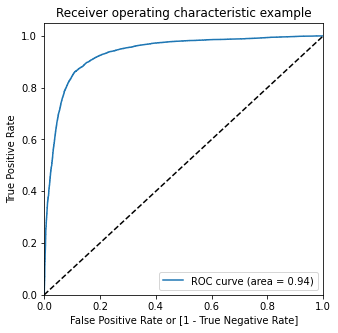

confusion matrix: 
[[11742  1768]
 [ 1645 11865]]
Accuracy:  0.8736861584011844
Precision:  0.8703146776204798
Recall:  0.8782383419689119
F1_score:  0.8742585565339129
AUC score:  0.9354094754495532


In [83]:
get_accuracy_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_rfe_train')

### Let's check for test data set

In [86]:
telecom_test_df.shape

(30000, 133)

In [87]:
telecom_test_sol_df.shape

(30000, 2)

In [88]:
# Lets do prediction on telecom_test_df dataset

In [89]:
telecom_test_df_ori = telecom_test_df

In [90]:
telecom_test_df = telecom_test_df[col]
telecom_test_df = sm.add_constant(telecom_test_df)

In [91]:
y_pred_test = res.predict(telecom_test_df)

In [92]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_test})

In [93]:
y_pred_test_final.head()

,Churn_Prob
0,0.095771
1,0.289180
2,0.795274
3,0.149572
4,0.251050


In [94]:
y_pred_test_final['Churn_Prob_2'] =  y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Saving the y_pred_test_final['Churn_Prob_2'] for Kaggle submission.
### This will be updated if we find better model than Logistic + RFE for current dataset.

In [172]:
y_pred_test_final['Churn_Prob_2'].to_csv('Kaggle_solution.csv')

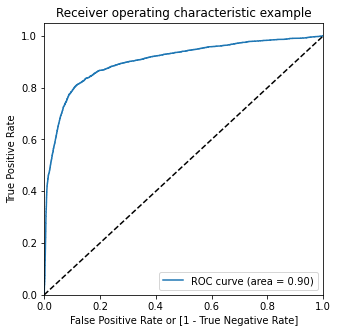

confusion matrix: 
[[21757  5184]
 [  417  2642]]
Accuracy:  0.8133
Precision:  0.3375926399182213
Recall:  0.8636809414841451
F1_score:  0.48543867707854854
AUC score:  0.9040531451295647


In [95]:
metrics_dict = get_accuracy_params(telecom_test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_rfe_test')

In [97]:
metrics_dict

{'Logistic_rfe_train': {'Accuracy': 0.8736861584011844,
  'Precision': 0.8703146776204798,
  'Recall': 0.8782383419689119,
  'F1 Score': 0.8742585565339129,
  'AUC Score': 0.9354094754495532},
 'Logistic_rfe_test': {'Accuracy': 0.8133,
  'Precision': 0.3375926399182213,
  'Recall': 0.8636809414841451,
  'F1 Score': 0.48543867707854854,
  'AUC Score': 0.9040531451295647}}

### This seems a good model but lets compare with other models.

## Model 2: Logistic Regression - To know Churn probability + PCA

PCA and Logistic Regression to check if model improves or not.

## PCA on the data

- While computing the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data.

In [98]:
# Looking at the data again

In [99]:
y_resampled.shape

(27020,)

In [100]:
X_resampled.shape

(27020, 133)

In [101]:
pca = PCA(random_state=42)

In [102]:
pca.fit(X_resampled)

PCA(random_state=42)

In [103]:
pca.components_

array([[ 1.72272362e-02,  1.33477150e-02, -5.61687277e-03, ...,
        -2.30237954e-02, -3.76580217e-02, -4.28337607e-02],
       [ 4.92446853e-02,  5.45767397e-02,  3.79811688e-02, ...,
        -1.95023066e-02, -3.67580723e-02, -5.07703972e-02],
       [ 4.94138619e-02,  7.32064801e-02,  6.77928166e-02, ...,
         8.35266686e-02,  1.31416750e-01,  1.40655073e-01],
       ...,
       [-0.00000000e+00, -5.68369853e-16, -4.19658483e-15, ...,
        -1.79816437e-15, -2.49587780e-16,  8.88134197e-16],
       [-0.00000000e+00,  4.07264584e-16,  1.04932839e-16, ...,
         1.39386901e-16, -1.09412742e-16,  2.22448130e-17],
       [-0.00000000e+00,  3.77062171e-16,  1.18409499e-17, ...,
        -2.63353675e-17,  5.13026983e-17, -5.92364270e-17]])

In [104]:
pca.explained_variance_ratio_

array([1.93965626e-01, 1.59002272e-01, 7.58684982e-02, 6.14233209e-02,
       5.28879862e-02, 4.90104971e-02, 4.51334414e-02, 3.23230294e-02,
       2.06485122e-02, 1.98748295e-02, 1.89824201e-02, 1.75633198e-02,
       1.52390912e-02, 1.27193209e-02, 1.22547594e-02, 1.17245884e-02,
       1.09537148e-02, 1.03610595e-02, 1.01395076e-02, 9.54905655e-03,
       8.74196531e-03, 8.31000688e-03, 7.58586852e-03, 6.93090023e-03,
       6.68989541e-03, 6.62319626e-03, 6.27285583e-03, 5.66203070e-03,
       5.26361425e-03, 5.18694037e-03, 4.75497562e-03, 4.65492339e-03,
       4.09776463e-03, 3.69594860e-03, 3.36222285e-03, 3.15729062e-03,
       3.11719526e-03, 2.94309582e-03, 2.90976176e-03, 2.78510225e-03,
       2.77140406e-03, 2.58862503e-03, 2.52871507e-03, 2.44709115e-03,
       2.32253056e-03, 2.14189804e-03, 2.12319756e-03, 2.07030334e-03,
       1.95704436e-03, 1.77240332e-03, 1.74217374e-03, 1.69423288e-03,
       1.63946555e-03, 1.55922274e-03, 1.42715064e-03, 1.38813929e-03,
      

In [105]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

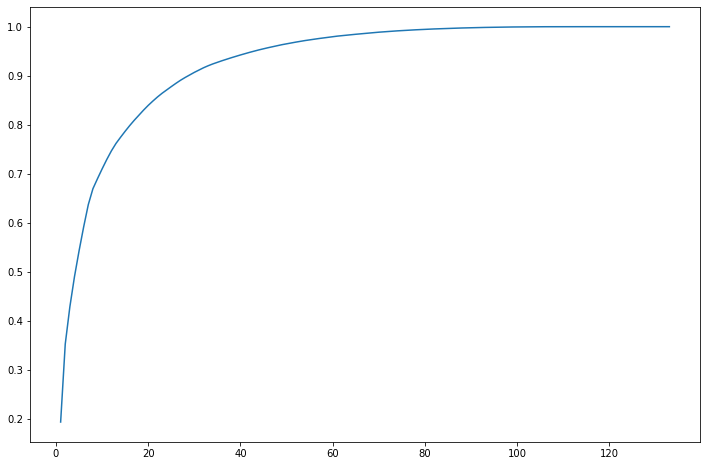

In [106]:
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)

## Looking at the scree plot with 50 PCs we have more than 95% of variance explained.

In [107]:
pca_final = IncrementalPCA(n_components=50)

In [108]:
df_train_pca = pca_final.fit_transform(X_resampled)

In [109]:
df_train_pca.shape

(27020, 50)

In [110]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [111]:
corrmat.shape

(50, 50)

In [112]:
corrmat

array([[ 1.00000000e+00, -2.26497063e-07, -3.04135007e-08, ...,
         3.75441714e-05, -3.87972451e-05, -3.14671977e-05],
       [-2.26497063e-07,  1.00000000e+00, -2.04119736e-07, ...,
         2.93285208e-05, -4.46860262e-05, -4.18584540e-05],
       [-3.04135007e-08, -2.04119736e-07,  1.00000000e+00, ...,
         2.79962499e-05,  1.63081375e-04, -9.15290148e-05],
       ...,
       [ 3.75441714e-05,  2.93285208e-05,  2.79962499e-05, ...,
         1.00000000e+00, -7.13571080e-02, -8.20091116e-02],
       [-3.87972451e-05, -4.46860262e-05,  1.63081375e-04, ...,
        -7.13571080e-02,  1.00000000e+00,  7.09342725e-02],
       [-3.14671977e-05, -4.18584540e-05, -9.15290148e-05, ...,
        -8.20091116e-02,  7.09342725e-02,  1.00000000e+00]])

### Applying the transformation on the test set

In [113]:
telecom_test_df_ori.shape

(30000, 133)

In [114]:
df_test_pca = pca_final.transform(telecom_test_df_ori)
df_test_pca.shape

(30000, 50)

## Applying logistic regression on the data on our Principal components

In [115]:
learner_pca = LogisticRegression()

In [116]:
model_pca = learner_pca.fit(df_train_pca, y_resampled)

In [117]:
y_pred_proba = model_pca.predict_proba(df_train_pca)[::,1]

In [118]:
y_pred_proba

array([0.94835413, 0.07173978, 0.08596745, ..., 0.8539864 , 0.78329563,
       0.51422168])

In [119]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_proba})

In [120]:
y_pred_train_final['Churn_Prob_2'] = y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

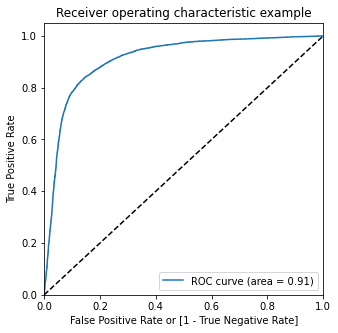

confusion matrix: 
[[10981  2529]
 [ 1749 11761]]
Accuracy:  0.8416728349370837
Precision:  0.8230230930720783
Recall:  0.870540340488527
F1_score:  0.8461151079136691
AUC score:  0.9110417701940774


In [121]:
get_accuracy_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_pca_train')

In [122]:
metrics_dict

{'Logistic_rfe_train': {'Accuracy': 0.8736861584011844,
  'Precision': 0.8703146776204798,
  'Recall': 0.8782383419689119,
  'F1 Score': 0.8742585565339129,
  'AUC Score': 0.9354094754495532},
 'Logistic_rfe_test': {'Accuracy': 0.8133,
  'Precision': 0.3375926399182213,
  'Recall': 0.8636809414841451,
  'F1 Score': 0.48543867707854854,
  'AUC Score': 0.9040531451295647},
 'Logistic_pca_train': {'Accuracy': 0.8416728349370837,
  'Precision': 0.8230230930720783,
  'Recall': 0.870540340488527,
  'F1 Score': 0.8461151079136691,
  'AUC Score': 0.9110417701940774}}

### Making predictions on the test set

In [123]:
y_pred_proba = model_pca.predict_proba(df_test_pca)[::,1]

In [124]:
y_pred_proba

array([0.16384109, 0.26888822, 0.69824351, ..., 0.61861141, 0.85280927,
       0.03730298])

In [125]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_proba})

In [126]:
y_pred_test_final['Churn_Prob_2'] = y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

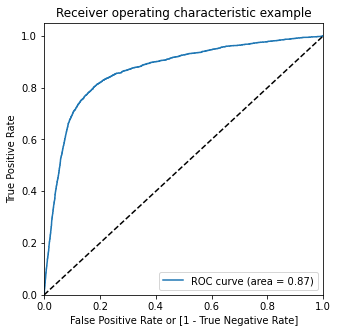

confusion matrix: 
[[17954  8987]
 [  367  2692]]
Accuracy:  0.6882
Precision:  0.230499186574193
Recall:  0.8800261523373651
F1_score:  0.36531415388790883
AUC score:  0.8685962019920784


In [127]:
metrics_dict = get_accuracy_params(telecom_test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_pca_test')

In [129]:
metrics_dict

{'Logistic_rfe_train': {'Accuracy': 0.8736861584011844,
  'Precision': 0.8703146776204798,
  'Recall': 0.8782383419689119,
  'F1 Score': 0.8742585565339129,
  'AUC Score': 0.9354094754495532},
 'Logistic_rfe_test': {'Accuracy': 0.8133,
  'Precision': 0.3375926399182213,
  'Recall': 0.8636809414841451,
  'F1 Score': 0.48543867707854854,
  'AUC Score': 0.9040531451295647},
 'Logistic_pca_train': {'Accuracy': 0.8416728349370837,
  'Precision': 0.8230230930720783,
  'Recall': 0.870540340488527,
  'F1 Score': 0.8461151079136691,
  'AUC Score': 0.9110417701940774},
 'Logistic_pca_test': {'Accuracy': 0.6882,
  'Precision': 0.230499186574193,
  'Recall': 0.8800261523373651,
  'F1 Score': 0.36531415388790883,
  'AUC Score': 0.8685962019920784}}

### So we could see the Recall coming close to 88% but Accuracy went down close to 69%. This is because Precision has gone down to 23%.
We got a rough idea with PCA and Logistic Regression.
We now move to Lasso and Ridge Regression for further analysis and actual conclusion on right predictors and coefficients.
Let's try other models to see how it performs.

### Model 3. Ridge Regression

In [130]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [132]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.001

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_resampled, y_resampled) 

Ridge(alpha=0.001)

In [133]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.031917,0.013562,0.002588,0.000255,0.0001,{'alpha': 0.0001},-0.320759,-0.324360,-0.320218,-0.311633,...,-0.283301,-0.284880,-0.284433,-0.287516,-0.286188,-0.285877,-0.284647,-0.286092,-0.284948,0.001391
1,0.028812,0.005022,0.003215,0.000826,0.0010,{'alpha': 0.001},-0.320869,-0.324441,-0.320269,-0.311620,...,-0.283305,-0.284892,-0.284448,-0.287524,-0.286207,-0.285895,-0.284674,-0.286108,-0.284960,0.001395
2,0.040181,0.006247,0.003922,0.000524,0.0100,{'alpha': 0.01},-0.321799,-0.325518,-0.320933,-0.312213,...,-0.283367,-0.284954,-0.284488,-0.287702,-0.286512,-0.286221,-0.285027,-0.286415,-0.285131,0.001482
3,0.028597,0.003975,0.003024,0.000371,0.0500,{'alpha': 0.05},-0.325108,-0.328730,-0.324256,-0.314889,...,-0.283580,-0.285177,-0.284707,-0.288583,-0.288018,-0.287772,-0.286615,-0.287936,-0.285937,0.001981
4,0.030895,0.004526,0.003191,0.000827,0.1000,{'alpha': 0.1},-0.328383,-0.331817,-0.327688,-0.317790,...,-0.284249,-0.285857,-0.285403,-0.290019,-0.290200,-0.289922,-0.288843,-0.290089,-0.287289,0.002611


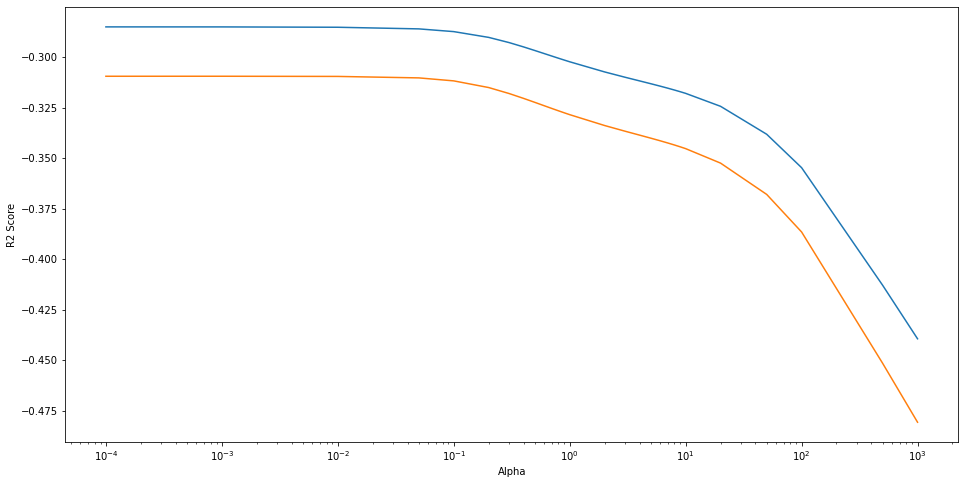

In [134]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

## Looking at the curve, as they are not converging we will go ahead and check Lasso model.

## Model 4. Lasso

In [135]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [136]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [137]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_resampled, y_resampled) 

Lasso(alpha=0.0001)

In [138]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.033296,0.167405,0.003875,0.000413,0.0001,{'alpha': 0.0001},-0.342758,-0.345149,-0.342245,-0.333077,...,-0.293868,-0.295504,-0.294786,-0.300797,-0.301860,-0.301542,-0.300442,-0.301755,-0.297816,0.003527
1,0.061320,0.005488,0.003181,0.000382,0.0010,{'alpha': 0.001},-0.379843,-0.382797,-0.377481,-0.370381,...,-0.330493,-0.332345,-0.331081,-0.341130,-0.344662,-0.343850,-0.344249,-0.344160,-0.337225,0.006482
2,0.036674,0.003430,0.003046,0.000414,0.0100,{'alpha': 0.01},-0.522700,-0.521839,-0.524863,-0.521166,...,-0.480786,-0.480388,-0.481116,-0.484637,-0.480199,-0.479363,-0.479927,-0.479747,-0.480681,0.001402
3,0.031760,0.001120,0.002726,0.000166,0.0500,{'alpha': 0.05},-0.538660,-0.538455,-0.539627,-0.538866,...,-0.495597,-0.495682,-0.495643,-0.499784,-0.493827,-0.493827,-0.493827,-0.493827,-0.495345,0.001716
4,0.034461,0.003696,0.003018,0.000527,0.1000,{'alpha': 0.1},-0.538660,-0.538455,-0.539627,-0.538866,...,-0.495597,-0.495682,-0.495643,-0.499784,-0.493827,-0.493827,-0.493827,-0.493827,-0.495345,0.001716


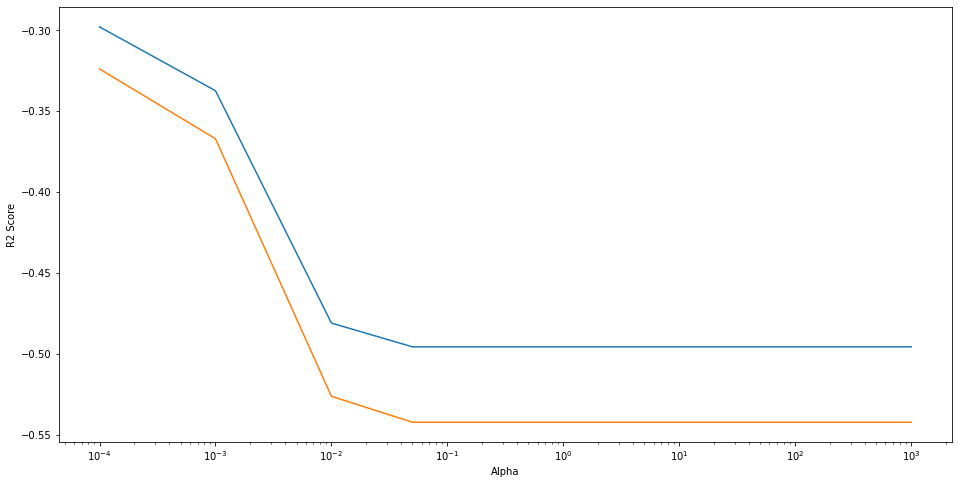

In [139]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

### Looking at the curve, as they are not converging it seems even Lasso model is not working well here.

## Model 5. Tree models - Random Forest

In [140]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [141]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [142]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [143]:
%%time
grid_search.fit(X_resampled, y_resampled)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 15 s, sys: 652 ms, total: 15.6 s
Wall time: 2min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [144]:
grid_search.best_score_

0.9521465581051073

In [145]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

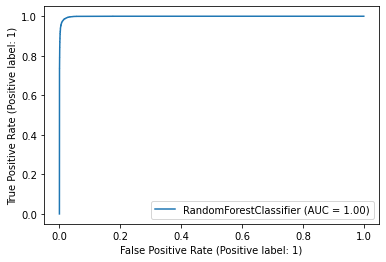

In [146]:
plot_roc_curve(rf_best, X_resampled, y_resampled)
plt.show()

In [147]:
rf_best.feature_importances_

array([2.84975372e-03, 4.23263050e-03, 1.86801513e-02, 3.90238606e-03,
       4.72762150e-03, 6.57080452e-03, 2.27511783e-03, 3.20679651e-03,
       4.89555694e-03, 2.08101837e-03, 4.34559730e-03, 4.29011415e-02,
       2.52587490e-03, 9.67434130e-03, 5.55297902e-02, 2.43331146e-03,
       2.94447506e-03, 9.64069425e-03, 2.60599016e-03, 3.32497203e-03,
       1.73220176e-02, 1.30074250e-03, 2.11863743e-03, 1.46050756e-03,
       9.48893149e-04, 2.25189764e-03, 1.33020323e-03, 3.69948660e-03,
       4.93473682e-03, 3.24052470e-02, 4.23284820e-03, 4.56160044e-03,
       4.37891536e-03, 5.51274559e-03, 5.14144863e-03, 9.04192746e-03,
       9.37740529e-04, 5.44722158e-04, 5.02659461e-04, 4.78660752e-03,
       6.41141187e-03, 7.56529576e-03, 9.96027244e-04, 1.12496872e-03,
       1.24007097e-03, 2.56503546e-03, 4.65140398e-03, 2.54444750e-03,
       1.57969628e-03, 0.00000000e+00, 1.62322535e-06, 3.24595743e-03,
       4.46672973e-03, 2.52734908e-02, 3.11340507e-03, 2.93749087e-03,
      

In [148]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [149]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
80,total_ic_mou_8,0.094148
14,roam_og_mou_8,0.055530
104,total_rech_data_8,0.053576
59,loc_ic_t2m_mou_8,0.044727
11,roam_ic_mou_8,0.042901
101,last_day_rch_amt_8,0.038166
65,loc_ic_mou_8,0.035899
95,total_rech_amt_8,0.035616
107,max_rech_data_8,0.035380
29,loc_og_mou_8,0.032405


### Let's apply Random Forest on test data

In [150]:
y_pred_rf = rf_best.predict(telecom_test_df_ori)

In [151]:
telecom_test_sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [152]:
confusion = metrics.confusion_matrix(telecom_test_sol_df.churn_probability, y_pred_rf)

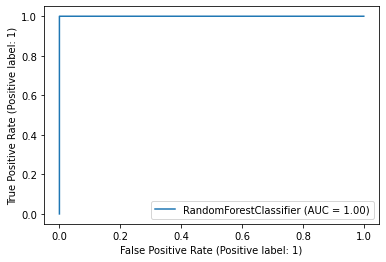

In [153]:
plot_roc_curve(rf_best, telecom_test_df_ori, y_pred_rf)

In [154]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

confusion matrix: 
[[25225  1716]
 [  784  2275]]
Accuracy:  0.9166666666666666
Precision:  0.5700325732899023
Recall:  0.7437070938215103
F1_score:  0.6453900709219857


In [156]:
metrics_dict['RandomForest_test'] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }

In [158]:
metrics_dict

{'Logistic_rfe_train': {'Accuracy': 0.8736861584011844,
  'Precision': 0.8703146776204798,
  'Recall': 0.8782383419689119,
  'F1 Score': 0.8742585565339129,
  'AUC Score': 0.9354094754495532},
 'Logistic_rfe_test': {'Accuracy': 0.8133,
  'Precision': 0.3375926399182213,
  'Recall': 0.8636809414841451,
  'F1 Score': 0.48543867707854854,
  'AUC Score': 0.9040531451295647},
 'Logistic_pca_train': {'Accuracy': 0.8416728349370837,
  'Precision': 0.8230230930720783,
  'Recall': 0.870540340488527,
  'F1 Score': 0.8461151079136691,
  'AUC Score': 0.9110417701940774},
 'Logistic_pca_test': {'Accuracy': 0.6882,
  'Precision': 0.230499186574193,
  'Recall': 0.8800261523373651,
  'F1 Score': 0.36531415388790883,
  'AUC Score': 0.8685962019920784},
 'RandomForest_test': {'Accuracy': 0.9166666666666666,
  'Precision': 0.5700325732899023,
  'Recall': 0.7437070938215103,
  'F1 Score': 0.6453900709219857}}

## Lets check XGBoost model as well

In [159]:
xgb_cfl = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic')

In [160]:
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [161]:
# Fit the model to our train and target
xgb_cfl.fit(X_resampled, y_resampled)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(telecom_test_df_ori)

In [162]:
xgb_predictions_prob = xgb_cfl.predict_proba(telecom_test_df_ori)
xgb_predictions_prob

array([[0.98011273, 0.01988727],
       [0.9845246 , 0.01547542],
       [0.1221928 , 0.8778072 ],
       ...,
       [0.81729877, 0.18270122],
       [0.8774729 , 0.12252714],
       [0.9986315 , 0.00136855]], dtype=float32)

In [163]:
xgb_predictions_prob.shape

(30000, 2)

In [164]:
xgb_predictions_prob.reshape(-1, )

array([0.98011273, 0.01988727, 0.9845246 , ..., 0.12252714, 0.9986315 ,
       0.00136855], dtype=float32)

In [165]:
len(xgb_predictions)

30000

In [166]:
accuracy_score(telecom_test_sol_df.churn_probability, xgb_predictions)

0.9324666666666667

### we see 93.48% accuracy score with default values of XGBoost.

In [167]:
confusion = metrics.confusion_matrix(telecom_test_sol_df.churn_probability, xgb_predictions)

In [ ]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

In [168]:
metrics_dict['XGBoost_test'] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }

In [169]:
metrics_dict

{'Logistic_rfe_train': {'Accuracy': 0.8736861584011844,
  'Precision': 0.8703146776204798,
  'Recall': 0.8782383419689119,
  'F1 Score': 0.8742585565339129,
  'AUC Score': 0.9354094754495532},
 'Logistic_rfe_test': {'Accuracy': 0.8133,
  'Precision': 0.3375926399182213,
  'Recall': 0.8636809414841451,
  'F1 Score': 0.48543867707854854,
  'AUC Score': 0.9040531451295647},
 'Logistic_pca_train': {'Accuracy': 0.8416728349370837,
  'Precision': 0.8230230930720783,
  'Recall': 0.870540340488527,
  'F1 Score': 0.8461151079136691,
  'AUC Score': 0.9110417701940774},
 'Logistic_pca_test': {'Accuracy': 0.6882,
  'Precision': 0.230499186574193,
  'Recall': 0.8800261523373651,
  'F1 Score': 0.36531415388790883,
  'AUC Score': 0.8685962019920784},
 'RandomForest_test': {'Accuracy': 0.9166666666666666,
  'Precision': 0.5700325732899023,
  'Recall': 0.7437070938215103,
  'F1 Score': 0.6453900709219857},
 'XGBoost_test': {'Accuracy': 0.9166666666666666,
  'Precision': 0.5700325732899023,
  'Recall': 

### HPT - Random Search for XGBoost

In [ ]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 10
random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=folds, verbose=3, random_state=42)

In [ ]:
random_search.fit(X_resampled, y_resampled)

In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
# Get our predictions
xgb_predictions = random_search.predict(telecom_test_df_ori)

In [ ]:
xgb_predictions_prob = random_search.predict_proba(telecom_test_df_ori)
xgb_predictions_prob

In [ ]:
xgb_predictions_prob.shape

In [ ]:
accuracy_score(telecom_test_sol_df.churn_probability, xgb_predictions)

In [ ]:
confusion = metrics.confusion_matrix(telecom_test_sol_df.churn_probability, xgb_predictions)

In [ ]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

### We can see both accuracy and recall are better for XGBoost model without any hyper paramter tuning.

### Let's see the metrics_dict now to tell which model is performing best on the given test dataset.

In [170]:
metrics_dict

{'Logistic_rfe_train': {'Accuracy': 0.8736861584011844,
  'Precision': 0.8703146776204798,
  'Recall': 0.8782383419689119,
  'F1 Score': 0.8742585565339129,
  'AUC Score': 0.9354094754495532},
 'Logistic_rfe_test': {'Accuracy': 0.8133,
  'Precision': 0.3375926399182213,
  'Recall': 0.8636809414841451,
  'F1 Score': 0.48543867707854854,
  'AUC Score': 0.9040531451295647},
 'Logistic_pca_train': {'Accuracy': 0.8416728349370837,
  'Precision': 0.8230230930720783,
  'Recall': 0.870540340488527,
  'F1 Score': 0.8461151079136691,
  'AUC Score': 0.9110417701940774},
 'Logistic_pca_test': {'Accuracy': 0.6882,
  'Precision': 0.230499186574193,
  'Recall': 0.8800261523373651,
  'F1 Score': 0.36531415388790883,
  'AUC Score': 0.8685962019920784},
 'RandomForest_test': {'Accuracy': 0.9166666666666666,
  'Precision': 0.5700325732899023,
  'Recall': 0.7437070938215103,
  'F1 Score': 0.6453900709219857},
 'XGBoost_test': {'Accuracy': 0.9166666666666666,
  'Precision': 0.5700325732899023,
  'Recall': 

## Looking at all the models we think Logistic Regression with RFE is best here as it gives better Acccuracy and Recall.

## Top 15 features for Logistic Regression with RFE is

In [201]:
top_feature_lg_rfe

['loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_mou_8',
 'std_og_t2m_mou_8',
 'arpu_8',
 'roam_og_mou_8',
 'loc_ic_mou_7',
 'max_rech_amt_8',
 'onnet_mou_7',
 'arpu_7',
 'std_og_mou_7',
 'std_ic_t2t_mou_6',
 'total_rech_num_7',
 'roam_og_mou_7',
 'max_rech_data_6',
 'loc_ic_t2m_mou_6',
 'arpu_6',
 'total_rech_data_6',
 'isd_ic_mou_8',
 'vol_2g_mb_7',
 'roam_ic_mou_6',
 'onnet_mou_6',
 'offnet_mou_6']